In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

# Data sets for Regression
X1 - basic regression
X1b - basic regression with some vars uncorrelated
X2 - quadratic relationship
X2b - exp relationship
X7 - binning

In [22]:
n = 150
X1 = np.random.randn(n)
noise = np.random.randn(n)
beta1 = -1.75
y1 = -3 + np.dot(X1,beta1) + noise
DF1 = pd.DataFrame(np.array([y1,X1]).T)

# adding 3 garbage columns
X1b = np.random.randn(n,4)
y1b = -3 + np.dot(X1b[:,2],beta1) + noise
DF1b = pd.DataFrame(np.append(X1b,y1b.reshape(n,1),1))

#quadratic
X2 = X1**2
y2 = -3 + np.dot(X2,beta1) + noise
DF2 = pd.DataFrame(np.array([y2,X1]).T)

# exponential
X2b = np.exp(X1)
y2b = -3 + np.dot(X2b,beta1) + noise
DF2b = pd.DataFrame(np.array([y2b,X1]).T)

# binning
X7 = 1.0*(X1 > 0)
y7 = -3 + np.dot(X7,beta1) + noise
DF7 = pd.DataFrame(np.array([y7,X1]).T)

# outliers
# y = y1
# y[0]=1000000;

# We are given data sets creatively named DF1, DF1b, DF2, DF2b and DF7. We have one tool so far: linear regression (fitting a straight line). What should we do? How should we start?


In [23]:
# Let's look at DF1
DF1

,0,1
0,-2.912453,-1.114595
1,-0.973075,-0.068602
2,-1.380167,-0.931361
3,-3.032004,-0.340385
4,-4.555595,0.924257
5,-3.097537,-0.578849
6,-3.263634,0.774643
7,-2.796869,-0.664254
8,0.366649,-0.877917
9,-1.228960,-0.710833


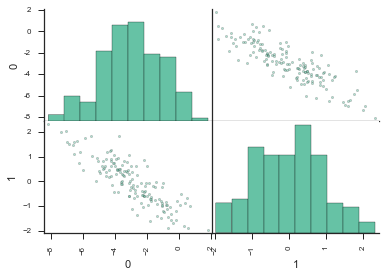

In [24]:
# Maybe not too helpful. Let's look at it.
scatter_matrix(DF1)
sns.despine()

In [25]:
# Seems promising! Let's do a linear fit
lr = linear_model.LinearRegression()
lr.fit(X1.reshape(-1,1),y1)
# These are the coefficients we found.
print lr.coef_, lr.intercept_

[-1.73907969] -2.99907482465


/Users/Chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


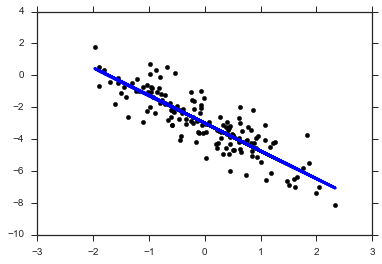

In [26]:
# And we can plot the fit again:
plt.scatter(X1.reshape(-1,1),y1,  color='black')
plt.plot(X1.reshape(-1.1), lr.predict(X1.reshape(-1,1)), color='blue',
         linewidth=3)

In [27]:
# Ok that was easy... Now let's look at DF1b. What to do?
DF1b

,0,1,2,3,4
0,1.508418,0.414155,-1.825349,-0.872916,-1.668632
1,0.181554,0.389919,0.998206,-0.508344,-2.839989
2,-0.187301,-1.874796,1.135460,1.301984,-4.997103
3,-0.453218,1.369646,-3.086287,0.474313,1.773324
4,-0.235105,-0.682705,0.126044,0.388025,-3.158723
5,-1.445619,1.077012,0.218588,0.342807,-4.493052
6,-2.029356,-2.397362,-2.049474,-0.668279,1.678571
7,1.942188,-0.063816,-0.507833,1.702423,-3.070607
8,0.224199,-0.725680,2.779922,0.711635,-6.034570
9,2.268518,0.148962,1.270956,-0.060734,-4.697090


# Let's look at this one too. But how?

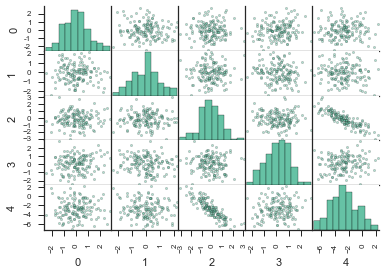

In [28]:
scatter_matrix(DF1b)
sns.despine()

# What happens if we try to find a relationship between y and the first column?

In [29]:
lr = linear_model.LinearRegression()
lr.fit(X1b[:,0].reshape(-1,1),y1)
# These are the coefficients we found.
print lr.coef_, lr.intercept_

[ 0.25226053] -2.97454002431


/Users/Chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


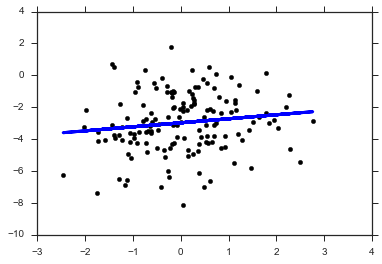

In [30]:
# And we can plot the fit again:
plt.scatter(X1b[:,0].reshape(-1,1),y1,  color='black')
plt.plot(X1b[:,0].reshape(-1.1), lr.predict(X1b[:,0].reshape(-1,1)), color='blue',
         linewidth=3)

# What are this plot and the values telling us? (Nothing...)

# On to the next thing...

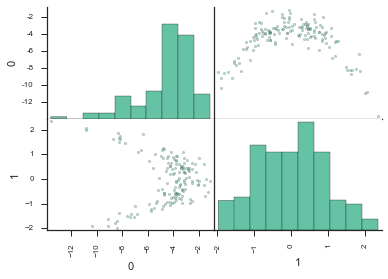

In [31]:
scatter_matrix(DF2)
sns.despine()

# Things look less promising... let's try to do linear regression anyway.

[-0.11869559] -4.49611920199


/Users/Chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


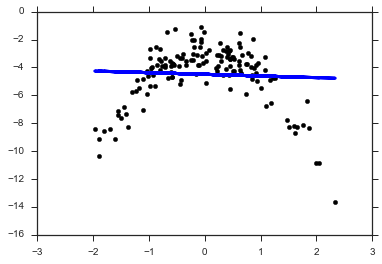

In [32]:
lr = linear_model.LinearRegression()
lr.fit(X1.reshape(-1,1),y2)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(X1.reshape(-1,1),y2,  color='black')
plt.plot(X1.reshape(-1.1), lr.predict(X1.reshape(-1,1)), color='blue',
         linewidth=3)

[-2.58830902] -5.68148759758


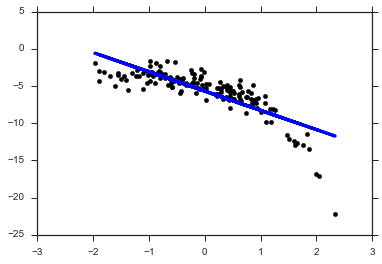

In [33]:
lr = linear_model.LinearRegression()
lr.fit(X1.reshape(-1,1),y2b)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(X1.reshape(-1,1),y2b,  color='black')
plt.plot(X1.reshape(-1,1), lr.predict(X1.reshape(-1,1)), color='blue',
         linewidth=3)

# Ideas for what we could do instead?

[-1.80577864] -2.95161762171


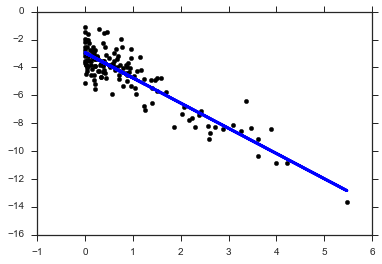

In [34]:
# The first plot looks more like a quadratic. Let's try that by transforming the data by the square:
Z = X1**2
lr = linear_model.LinearRegression()
lr.fit(Z.reshape(-1,1),y2)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(Z.reshape(-1,1),y2,  color='black')
plt.plot(Z.reshape(-1,1), lr.predict(Z.reshape(-1,1)), color='blue',
         linewidth=3)

# These things happen in real data sets. Example: Predicting Fuel Efficiency

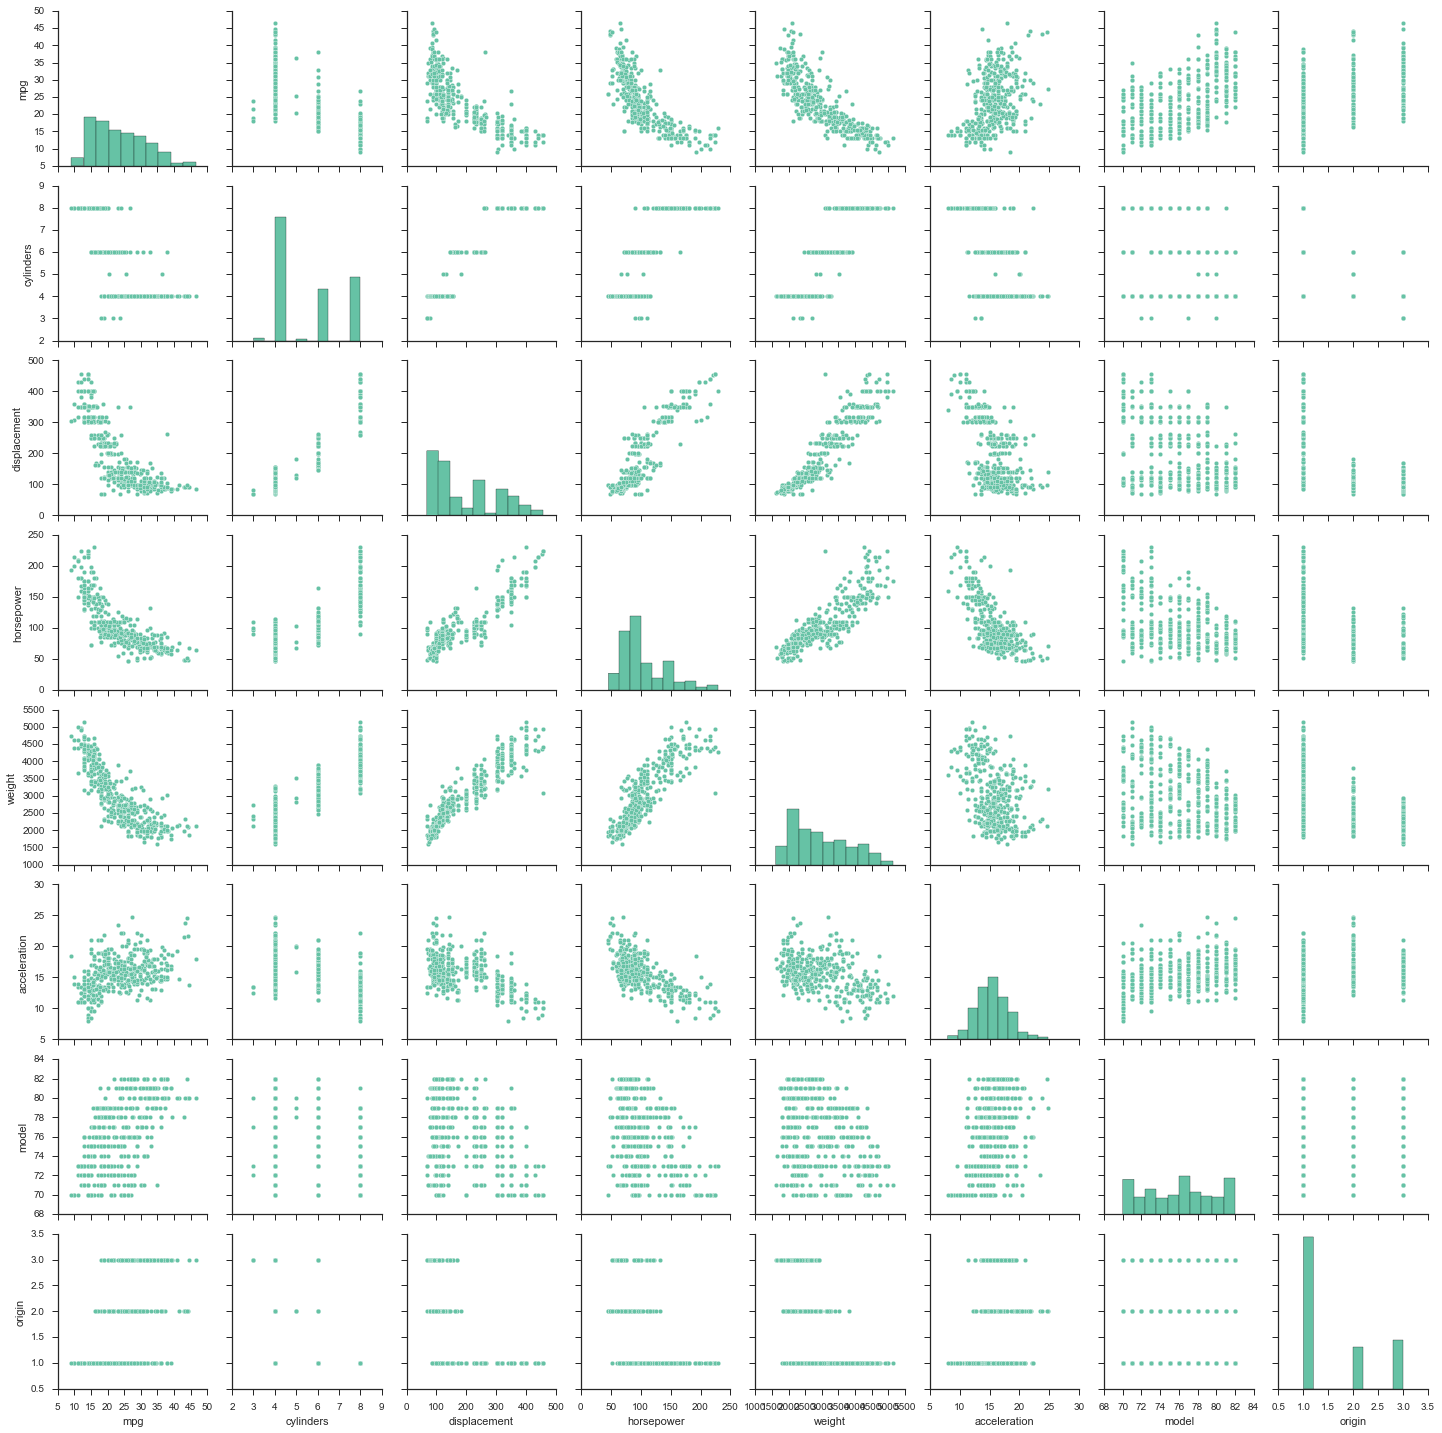

In [35]:
# A car data set -- Fuel Efficiency Data
# First we load the data
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
data = data.dropna()
sns.pairplot(data)

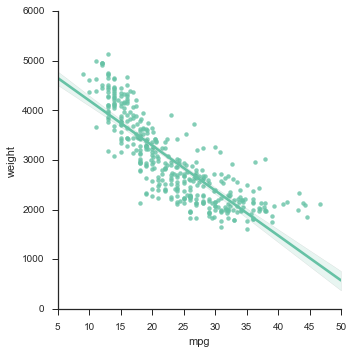

In [36]:
sns.lmplot("mpg", "weight", data, order=1);

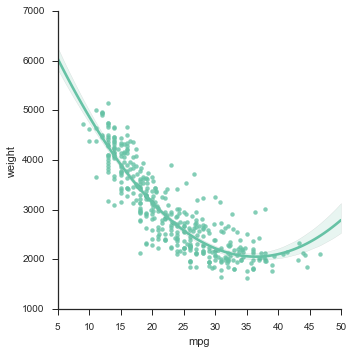

In [37]:
sns.lmplot("mpg", "weight", data, order=2);

# What do we do when we cannot visualize?

In [38]:
# Skewness: 
print compute_skewness(X1)
print compute_skewness(X2)
print compute_skewness(X2b)

NameError: name 'compute_skewness' is not defined

# Next!

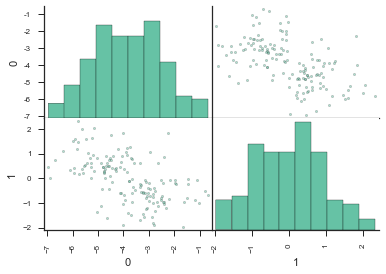

In [39]:
scatter_matrix(DF7)
sns.despine()

[-0.77299128] -3.85255641168


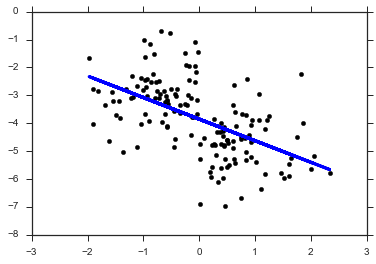

In [40]:
lr = linear_model.LinearRegression()
lr.fit(X1.reshape(-1,1),y7)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(X1.reshape(-1,1),y7,  color='black')
plt.plot(X1.reshape(-1,1), lr.predict(X1.reshape(-1,1)), color='blue',
         linewidth=3)

[-1.83928734] -2.95640470679


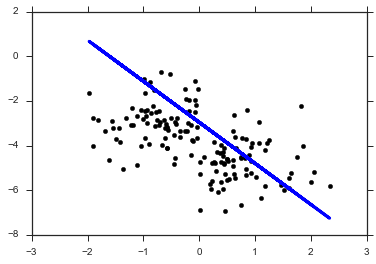

In [41]:
lr = linear_model.LinearRegression()
lr.fit(X7.reshape(-1,1),y7)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(X1.reshape(-1,1),y7,  color='black')
plt.plot(X1.reshape(-1,1), lr.predict(X1.reshape(-1,1)), color='blue',
         linewidth=3)

[-1.83928734] -2.95640470679


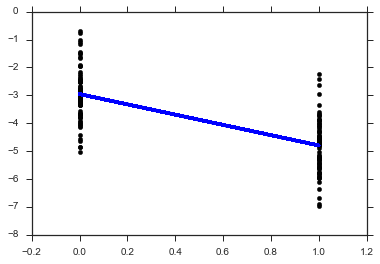

In [42]:
lr = linear_model.LinearRegression()
lr.fit(X7.reshape(-1,1),y7)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
# And we can plot the fit again:
plt.scatter(X7.reshape(-1,1),y7,  color='black')
plt.plot(X7.reshape(-1,1), lr.predict(X7.reshape(-1,1)), color='blue',
         linewidth=3)

In [43]:
def compute_skewness(x):
    n = x.shape[0]
    xbar = np.mean(x)
    v = np.mean((x - xbar)**2)*(n/(n-1))
    skew = np.mean((x-xbar)**3)*(n/(n-1))*(v**(-1.5))
    return skew


In [44]:
# Back to Simple Regression
lr = linear_model.LinearRegression()
lr.fit(X1.reshape(-1,1),y)
# These are the coefficients we found.
print lr.coef_, lr.intercept_
plt.scatter(X1[1:].reshape(-1,1),y[1:],  color='black')
plt.plot(X1[1:].reshape(-1,1), lr.predict(X1[1:].reshape(-1,1)), color='blue',
         linewidth=3)

NameError: name 'y' is not defined

# ???